# Machine Learning Stock Prediction Using Random Forest 

### Description: This program attempts to predict the future price of a stock
### 预测股票的未来价格

In [1]:
#Import all the libraries
#导入所需的模块
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 如何使用Python获取股票价格数据
### How to Get Stock Price Data Using Python

In [2]:
#为股票设定日期范围
start_date = '2015-01-01'
end_date = '2023-05-21'

#创建股票
ticker = 'TSLA'

#从yahoo财经下载股票数据
data = yf.download(ticker, start_date, end_date)
data.tail()

# Export data to a CSV file
# 将数据导出为CSV文件
data.to_csv("TSLA.csv")
# 找到你的文件位置

[*********************100%***********************]  1 of 1 completed


In [3]:
#选择tesla股票文件
df = pd.read_csv('TSLA.csv')
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...,...
2105,2023-05-15,167.660004,169.759995,164.550003,166.350006,166.350006,105592500
2106,2023-05-16,165.649994,169.520004,164.350006,166.520004,166.520004,98288800
2107,2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
2108,2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2021-05-26'),
  Text(0.0, 0, '2015-01-02'),
  Text(500.0, 0, '2016-12-27'),
  Text(1000.0, 0, '2018-12-21'),
  Text(1500.0, 0, '2020-12-16'),
  Text(2000.0, 0, '2022-12-12'),
  Text(2500.0, 0, '')])

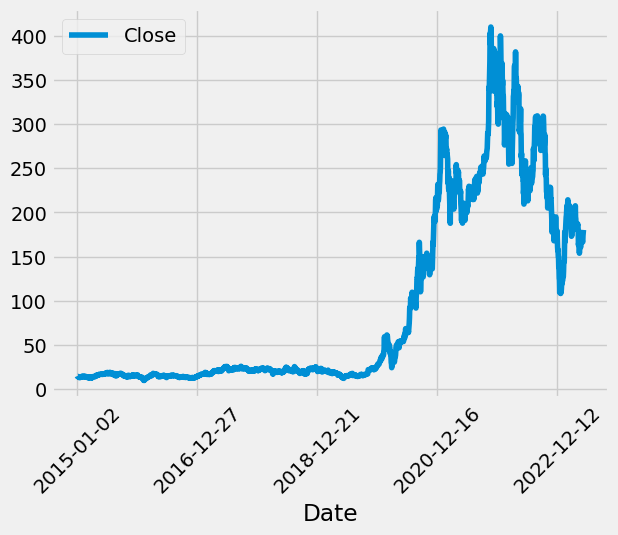

In [4]:
# 绘制图表
df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

In [5]:
# Create the model
# 创建模型
model = RandomForestRegressor()

In [6]:
# Train the model
# 训练模型
X = df[['Open', 'High', 'Low','Volume']]
X = X[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [7]:
# Test the model
# 测试模型
predictions = model.predict(X)
print('The model score is:', model.score(X,y))

The model score is: 0.9999053307194463


In [8]:
# Make the prediction
# 做出预测
new_data = df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:', prediction)
print('Actual value is:', df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [180.76519791]
Actual value is: 180.13999938964844
